In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8639609117150128857
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16689730222707226333
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [4]:
print(f"Initial shape of x_train: {x_train.shape}")
print(f"Number of samples in training data: {len(x_train)}")
print(f"Number of labels in training data: {len(y_train)}")
print(f"Number of samples in test data: {len(x_test)}")
print(f"Number of labels in test data: {len(y_test)}")

print("\n")
print(f"Dimensions of x_train: {x_train[0].shape}")
print(f"Labels in x_train: {y_train.shape}")
print("\n")
print(f"Dimensions of x_test: {x_test[0].shape}")
print(f"Labels in x_test: {y_test.shape}")

Initial shape of x_train: (60000, 28, 28)
Number of samples in training data: 60000
Number of labels in training data: 60000
Number of samples in test data: 10000
Number of labels in test data: 10000


Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)


Dimensions of x_test: (28, 28)
Labels in x_test: (10000,)


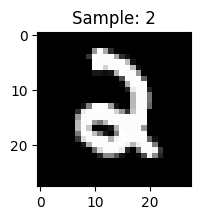

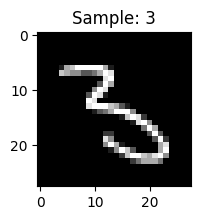

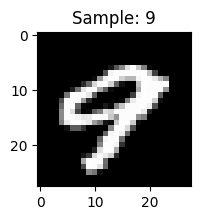

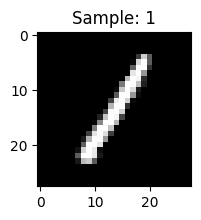

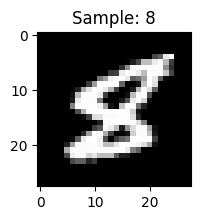

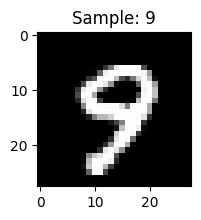

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow (title, image=None, size=6):
  if image.any():
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    print("Image not found")

for i in range(0, 6):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  imshow(f"Sample: {y_train[random_num]}", img, size=2)

<Figure size 640x480 with 0 Axes>

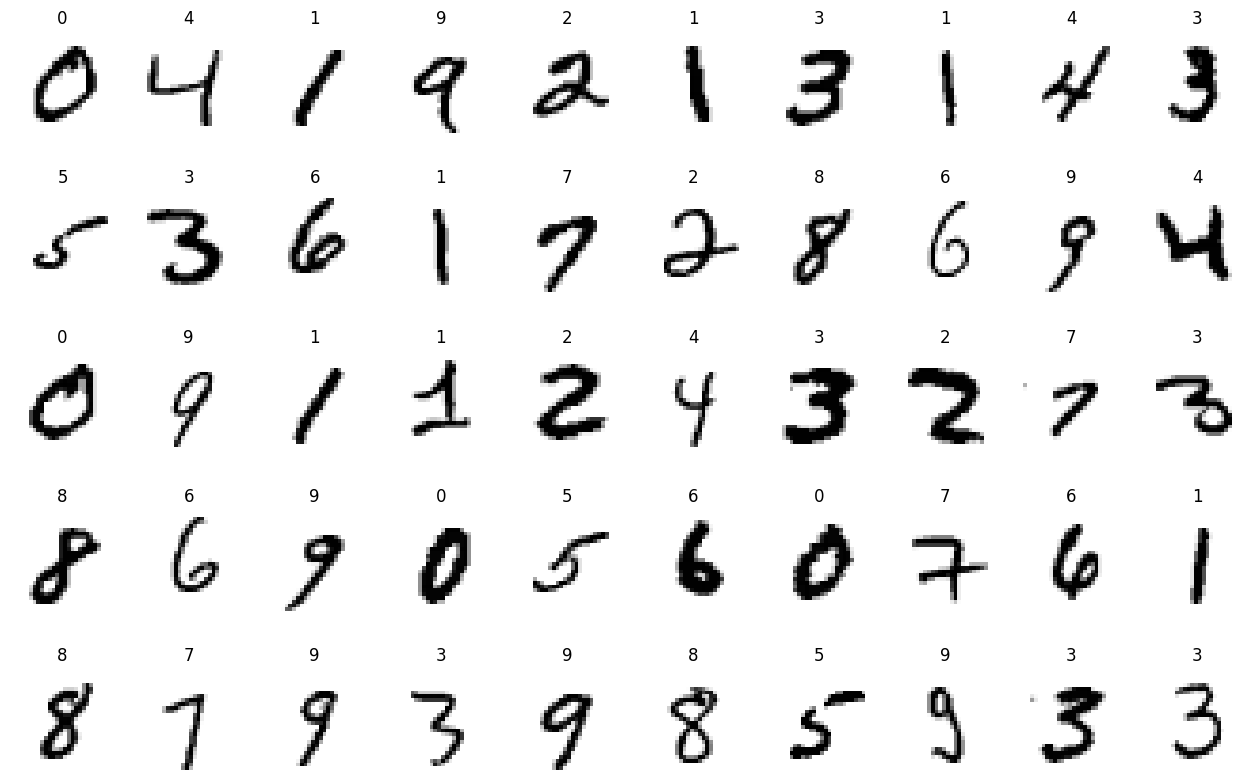

In [6]:
figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

In [7]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

print(f"x_train shape: {x_train.shape}")
print(f"{x_train.shape[0]} train samples")
print(f"{x_test.shape[0]} test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Number of Classes: {y_test.shape[1]}")

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

Number of Classes: 10


In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer=SGD(0.001),
              metrics=["accuracy"])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [15]:
batch_size = 128
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Epoch 1/25
469/469 [==============================] - 8s 8ms/step - loss: 2.1912 - accuracy: 0.3698 - val_loss: 2.0166 - val_accuracy: 0.6062
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 1.5167 - accuracy: 0.7186 - val_loss: 0.8931 - val_accuracy: 0.8166
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6519 - accuracy: 0.8413 - val_loss: 0.4778 - val_accuracy: 0.8756
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.4457 - accuracy: 0.8777 - val_loss: 0.3837 - val_accuracy: 0.8933
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3825 - accuracy: 0.8913 - val_loss: 0.3420 - val_accuracy: 0.9037
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3502 - accuracy: 0.8991 - val_loss: 0.3176 - val_accuracy: 0.9106
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3290 - accuracy: 0.9043 - val_loss: 0.3004 - val_accuracy: 0.9143
Epoch 

In [16]:
history_dict = history.history

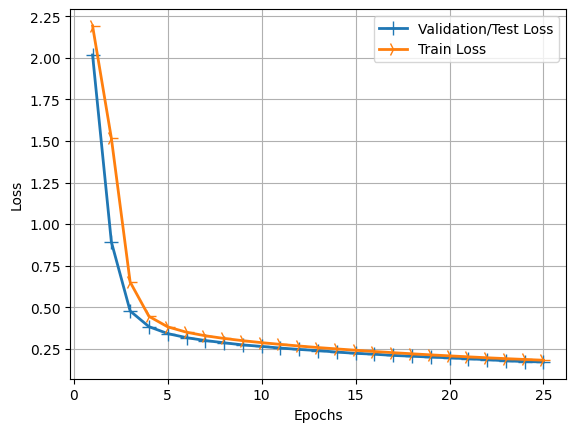

In [17]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label="Validation/Test Loss")
line2 = plt.plot(epochs, loss_values, label="Train Loss")

plt.setp(line1, linewidth=2.0, marker="+", markersize=10.0)
plt.setp(line2, linewidth=2.0, marker="4", markersize=10.0)

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.grid(True)
plt.legend()
plt.show()

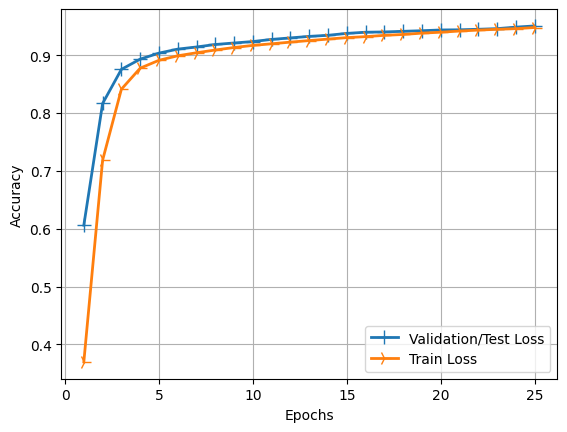

In [18]:
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_acc_values, label="Validation/Test Loss")
line2 = plt.plot(epochs, acc_values, label="Train Loss")

plt.setp(line1, linewidth=2.0, marker="+", markersize=10.0)
plt.setp(line2, linewidth=2.0, marker="4", markersize=10.0)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.grid(True)
plt.legend()
plt.show()

In [20]:
path = "/content/drive/MyDrive/ColabNotebooks/Modern Computer Vision My Code/mnist_simple_cnn_25_Epochs.h5"
model.save(path)
print("Model Saved")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved


In [21]:
from tensorflow.keras.models import load_model

classifier = load_model(path)

In [24]:
print(x_test.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completed")
print(pred)
print(type(pred))
print(len(pred))

(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 1s 2ms/step
Completed
[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


In [25]:
input_im = x_test[0]
print(input_im.shape)

input_im = input_im.reshape(1, 28, 28, 1)
print(input_im.shape)

pred= np.argmax(classifier.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 120ms/step
[7]
<class 'numpy.ndarray'>
1


1/1 [==============================] - 0s 18ms/step


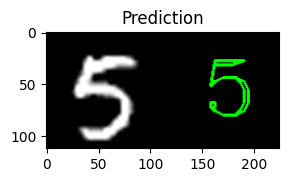

1/1 [==============================] - 0s 19ms/step


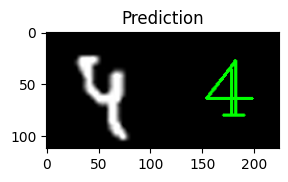

1/1 [==============================] - 0s 19ms/step


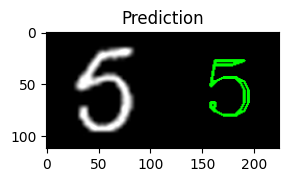

1/1 [==============================] - 0s 20ms/step


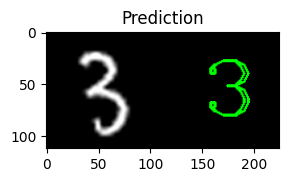

1/1 [==============================] - 0s 18ms/step


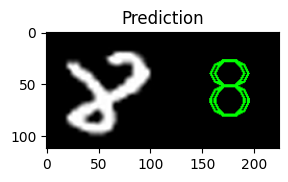

1/1 [==============================] - 0s 18ms/step


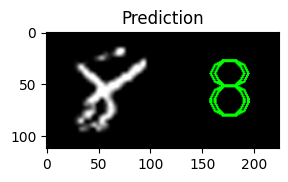

1/1 [==============================] - 0s 18ms/step


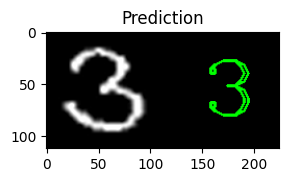

1/1 [==============================] - 0s 17ms/step


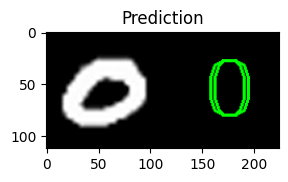

1/1 [==============================] - 0s 19ms/step


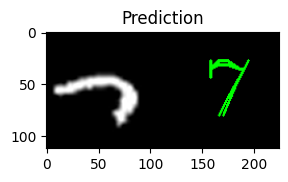

1/1 [==============================] - 0s 17ms/step


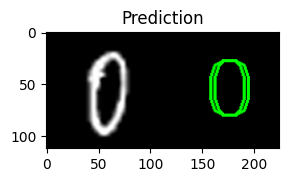

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def draw_test(name, pred, input_img):
  BLACK = [0, 0, 0]
  expanded_image = cv2.copyMakeBorder(input_img, 0, 0, 0, input_img.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
  expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
  cv2.putText(expanded_image, str(pred), (150, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
  imshow(name, expanded_image)

for i in range(0, 10):
  rand = np.random.randint(0, len(x_test))
  input_img = x_test[rand]

  imageL = cv2.resize(input_img, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
  input_img = input_img.reshape(1, 28, 28, 1)
  res = str(np.argmax(classifier.predict(input_img), axis=-1)[0])
  draw_test("Prediction", res, np.uint8(imageL))